In [2]:
# =========================================================
# Task 1: Exploratory Data Analysis & Preprocessing
# Cell 1: Setup
# =========================================================

# Standard libraries
from pathlib import Path

# Data libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Pandas display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Project root (Jupyter-safe)
# Notebook is in: rag-complaint-chatbot/notebooks/
PROJECT_ROOT = Path.cwd().parent

print("Project root:", PROJECT_ROOT)


Project root: c:\Users\Josh\Desktop\rag-complaint-chatbot


In [3]:
# =========================================================
# Task 1: Load CFPB complaint dataset
# Cell 2
# =========================================================

# Load dataset
df = pd.read_csv(PROJECT_ROOT / "data" / "raw" / "complaints.csv")

print("Dataset loaded successfully")
print("Shape:", df.shape)

df.head()


C:\Users\Josh\AppData\Local\Temp\ipykernel_2688\1870185288.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PROJECT_ROOT / "data" / "raw" / "complaints.csv")


Dataset loaded successfully
Shape: (9609797, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [4]:
# =========================================================
# Dataset structure
# Cell 3
# =========================================================

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [5]:
# =========================================================
# Identify complaint narrative column
# Cell 4
# =========================================================

narrative_columns = [col for col in df.columns if "narrative" in col.lower()]
narrative_columns


['Consumer complaint narrative']

In [6]:
# =========================================================
# Missing vs non-missing narratives
# Cell 5
# =========================================================

narrative_col = narrative_columns[0]

total = len(df)
with_narrative = df[narrative_col].notna().sum()
without_narrative = df[narrative_col].isna().sum()

print(f"Total complaints: {total}")
print(f"With narrative: {with_narrative}")
print(f"Without narrative: {without_narrative}")
print(f"Percentage with narrative: {with_narrative / total:.2%}")


Total complaints: 9609797
With narrative: 2980756
Without narrative: 6629041
Percentage with narrative: 31.02%


In [7]:
# =========================================================
# Product distribution analysis
# Cell 6
# =========================================================

# Identify product column (CFPB datasets usually contain 'Product')
product_columns = [col for col in df.columns if col.lower() == "product"]

product_columns


['Product']

In [8]:
# =========================================================
# Complaint counts by product
# Cell 7
# =========================================================

product_col = product_columns[0]

product_counts = df[product_col].value_counts()

product_counts


Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

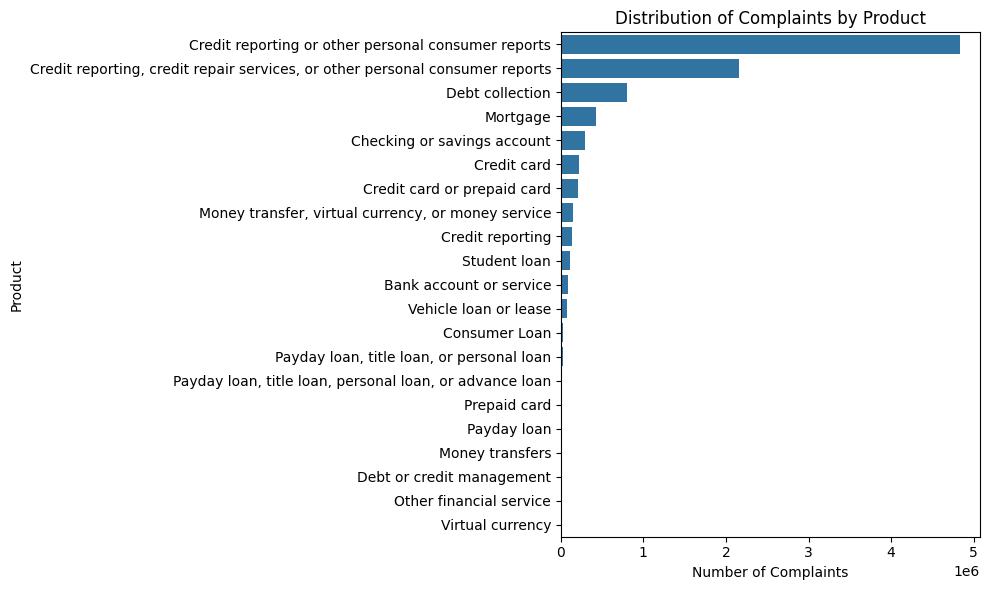

In [9]:
# =========================================================
# Product distribution visualization
# Cell 8
# =========================================================

plt.figure(figsize=(10, 6))
sns.barplot(
    x=product_counts.values,
    y=product_counts.index
)

plt.title("Distribution of Complaints by Product")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")

plt.tight_layout()
plt.show()


In [ ]:
# =========================================================
# Narrative length analysis
# Cell 9
# =========================================================

# Use previously identified narrative column
narrative_col = narrative_columns[0]

# Compute word counts
df["narrative_word_count"] = (
    df[narrative_col]
    .dropna()
    .str.split()
    .str.len()
)

# Basic statistics
df["narrative_word_count"].describe()
